In [2]:
import sys
sys.path.append('../')

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

from tensorflow.python.client import device_lib
print([dev.name for dev in device_lib.list_local_devices()])

['/device:CPU:0', '/device:GPU:0']


In [3]:
import keras
import tensorflow as tf
import numpy as np
from lib.encoding import decode_board, encode_board

In [4]:
data = np.memmap('../data/dataset/2023_1600.bin', dtype='int64', mode='r').reshape((-1, 3, 12))

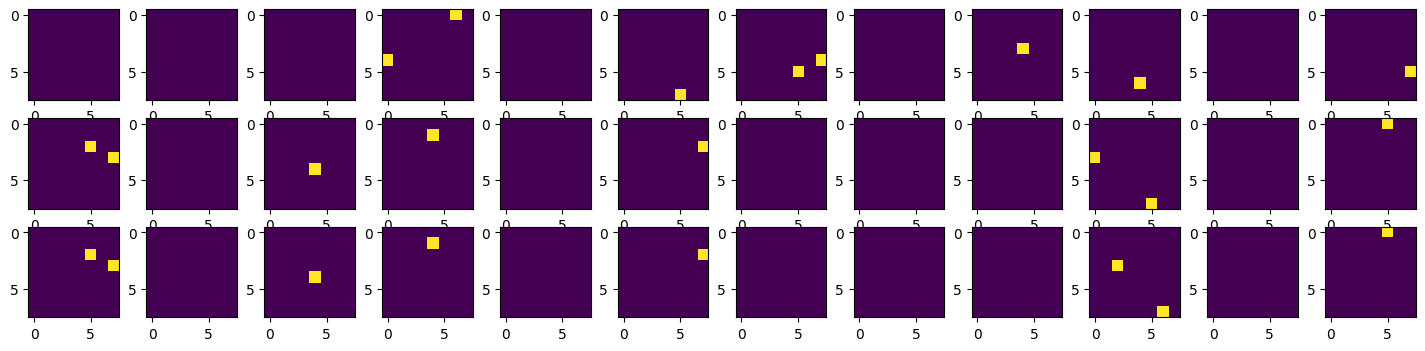

In [5]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(3, 12, figsize=(18, 4))
for kind in range(3):
    for layer in range(12):
        axs[kind][layer].imshow(decode_board(data[0]).numpy()[kind].reshape((12,8,8))[layer])
plt.show()

In [6]:
chess_model = keras.models.load_model('/mnt/c/Users/mlomb/Desktop/Tesis/cs-master-thesis/models/rq-mse-256-tanh-0.535.keras')

In [7]:
import onnx
import tf2onnx

# convert to onnx model
onnx_model, _ = tf2onnx.convert.from_keras(chess_model, opset=18)
onnx.save_model(onnx_model, '/mnt/c/Users/mlomb/Desktop/Tesis/cs-master-thesis/models/rq-mse-256-tanh-0.535.onnx')

In [8]:
import chess
chess_model(np.zeros((1,12)))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.22039789]], dtype=float32)>

b6b4 1.0


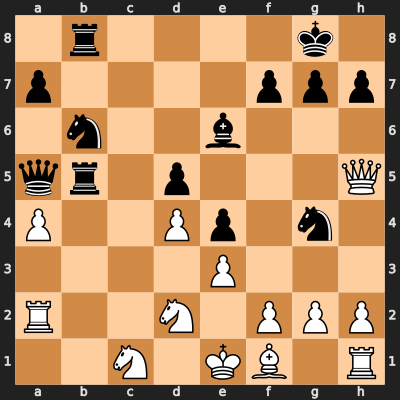

a4c4 1.0


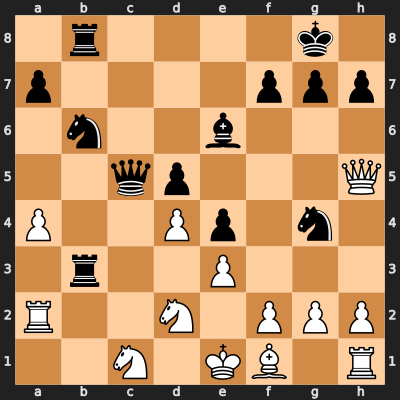

a4b4 1.0


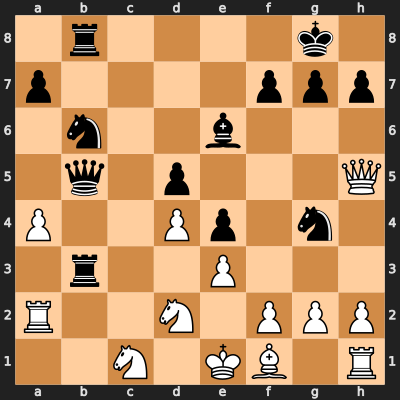

a4a3 1.0


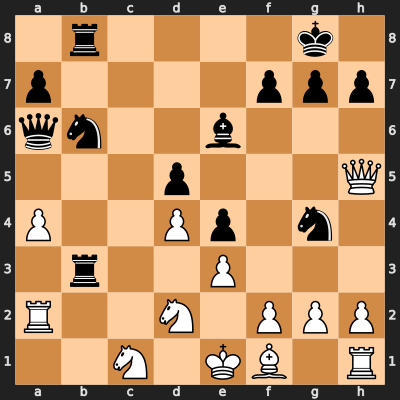

b1d1 0.99942285


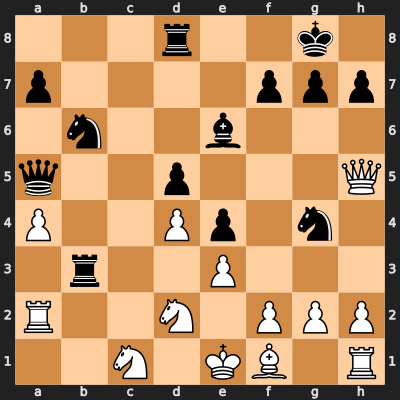

g1h1 0.9993192


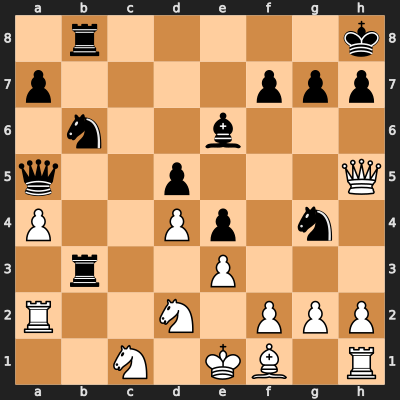

b1a1 0.98579085


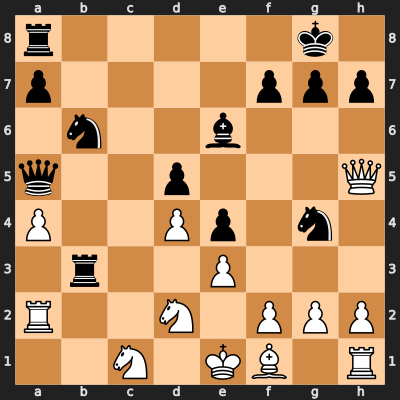

b1e1 0.9846783


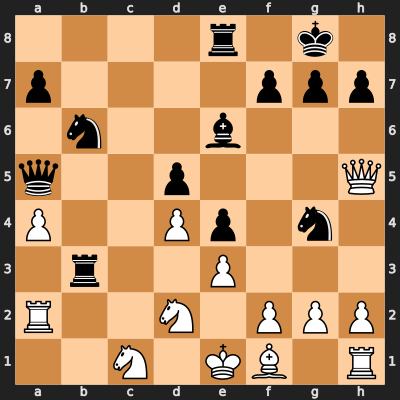

b1f1 0.9471807


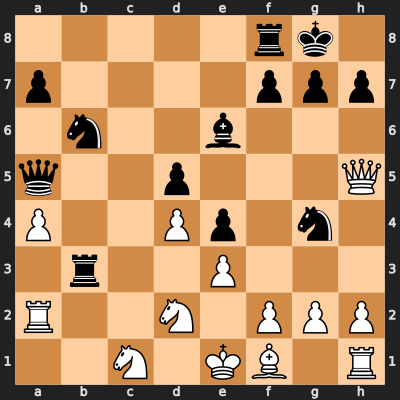

g5e4 0.8166296


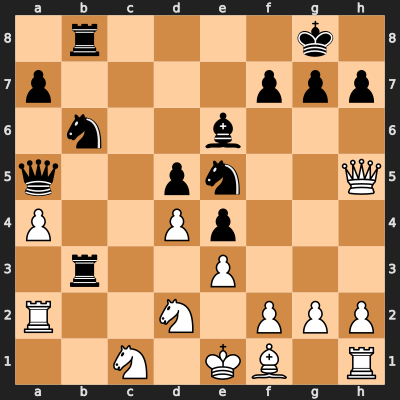

g2g4 0.35683537


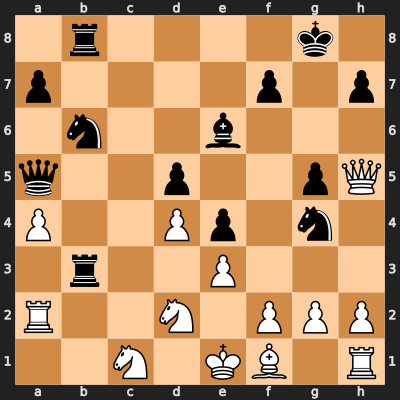

g5h7 0.2477583


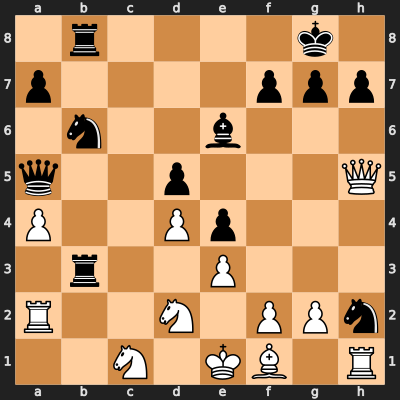

g1f1 0.10739526


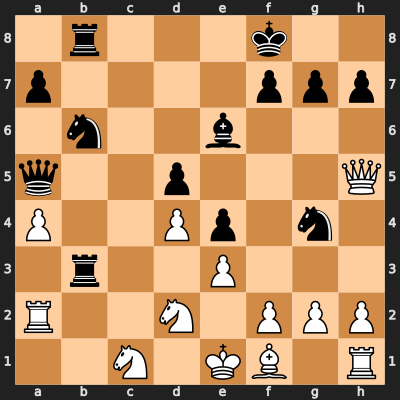

e3c1 -0.05573808


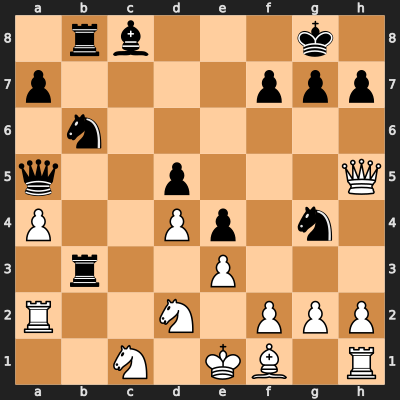

b3c1 -0.070935264


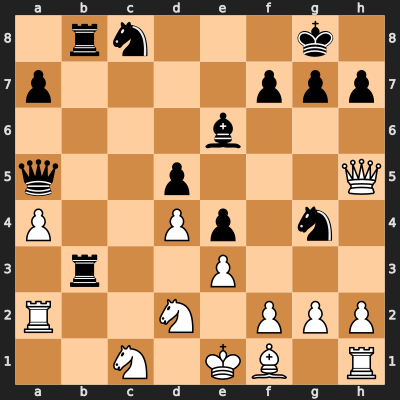

b3a1 -0.07132024


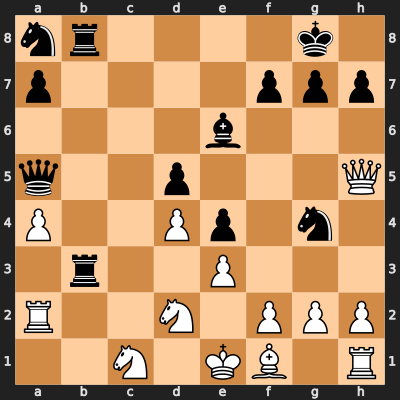

b1c1 -0.121233515


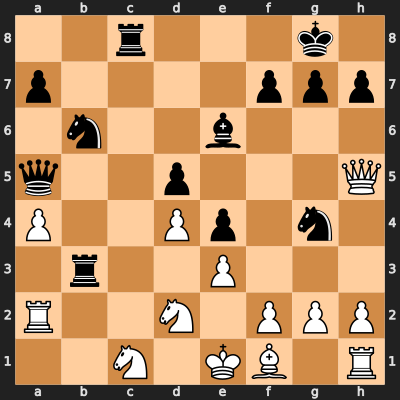

b1b2 -0.13227288


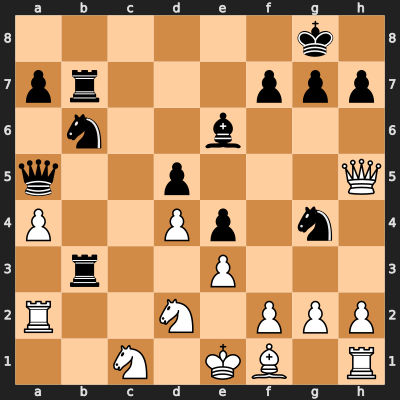

g5f7 -0.23217279


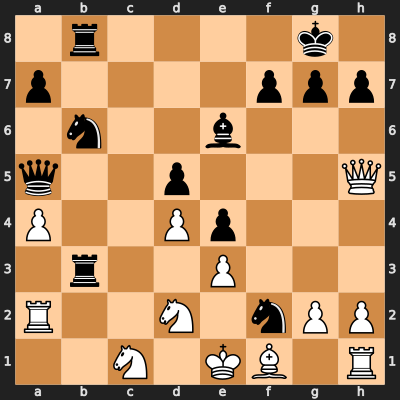

f2f3 -0.25447613


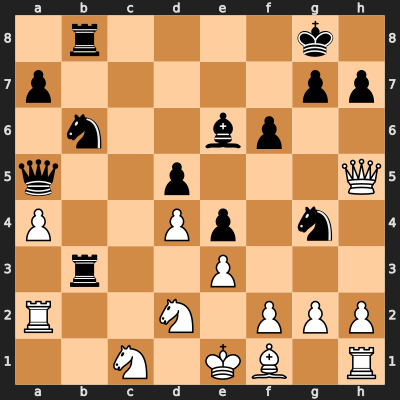

e3d2 -0.30454057


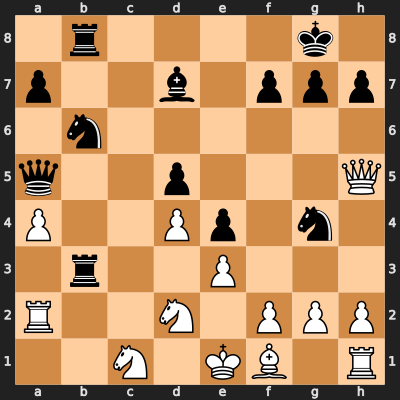

g5h3 -0.31047544


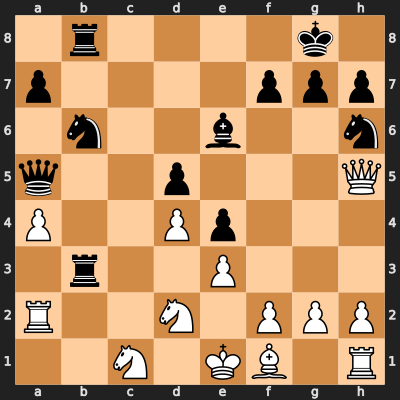

f2f4 -0.31813666


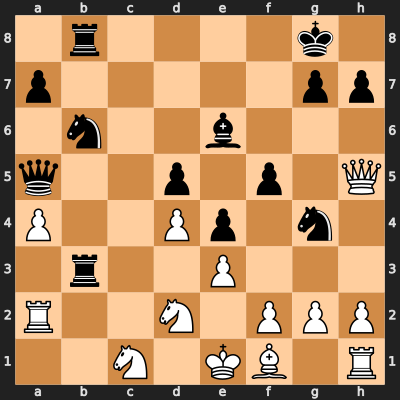

h2h3 -0.34709355


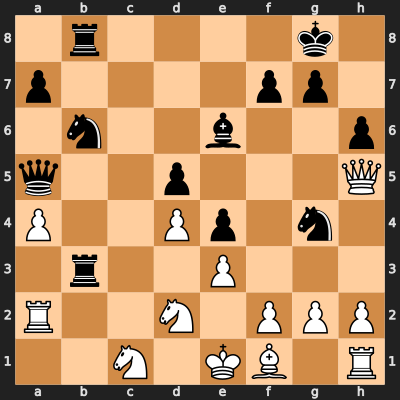

a2a3 -0.34852508


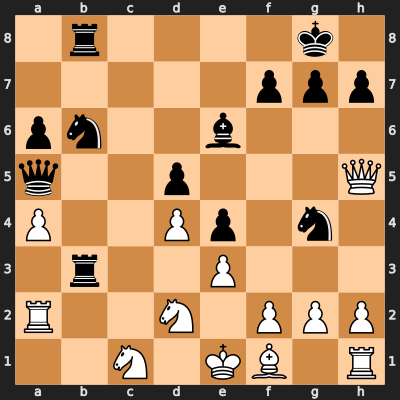

e3f4 -0.40186337


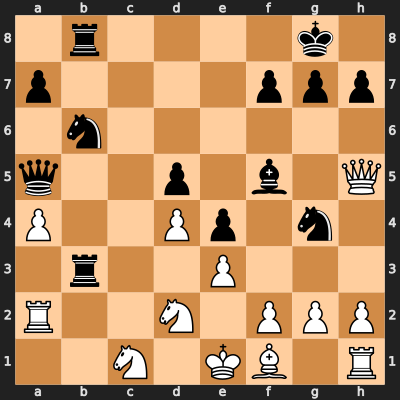

a4b5 -0.4128601


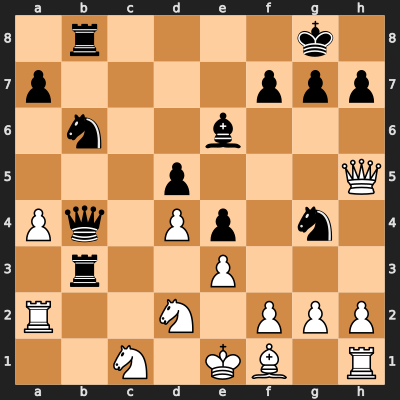

g2g3 -0.41965804


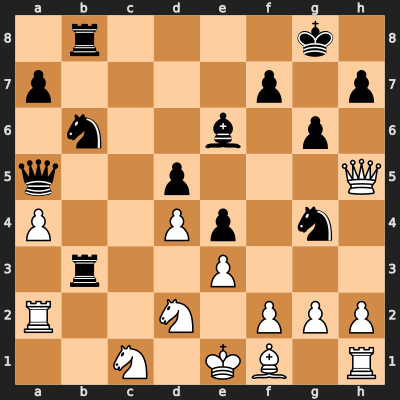

a4d7 -0.4297025


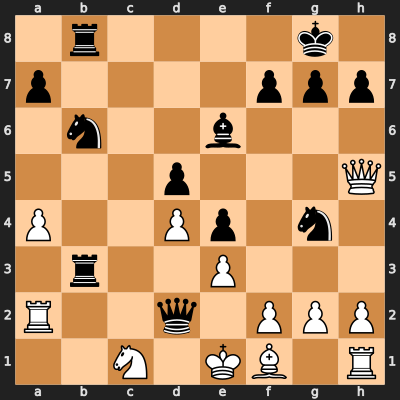

b3d2 -0.4548255


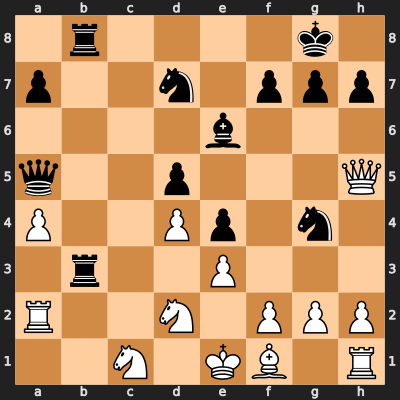

a4a5 -0.4612928


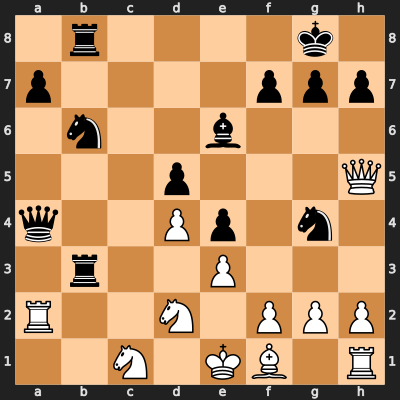

g5e6 -0.46160492


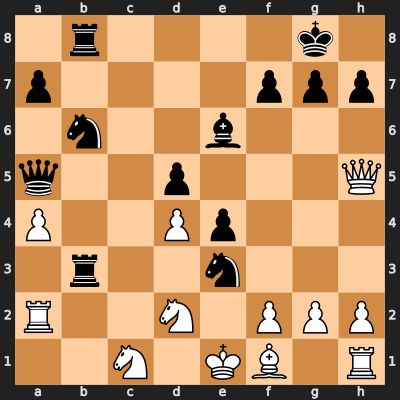

a4c6 -0.494947


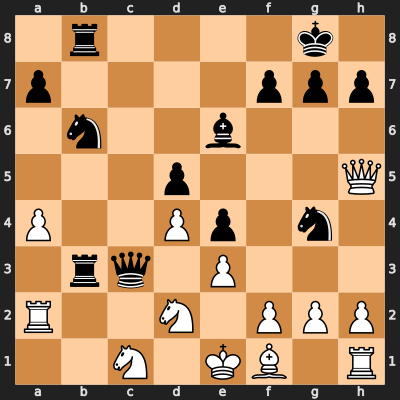

g5f3 -0.5091747


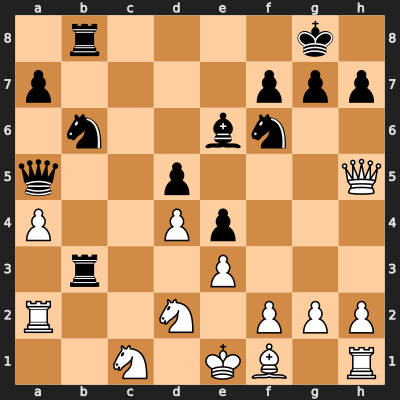

b6d6 -0.5095506


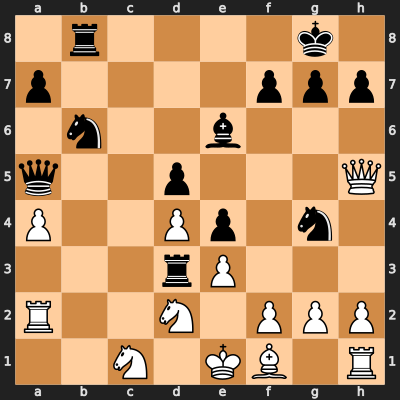

b6e6 -0.57846594


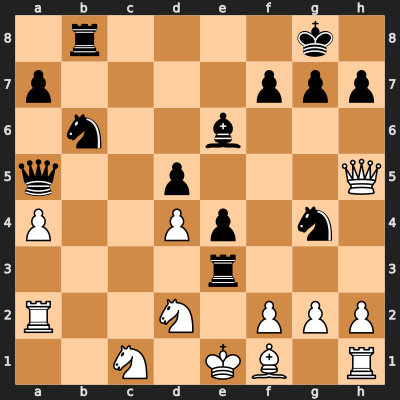

b3a5 -0.57934505


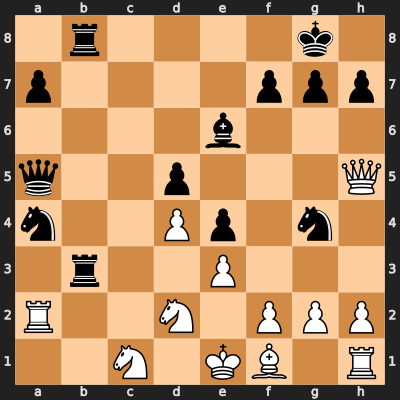

b3c5 -0.59123796


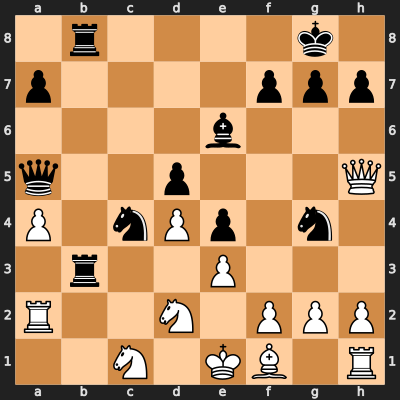

b6a6 -0.60687476


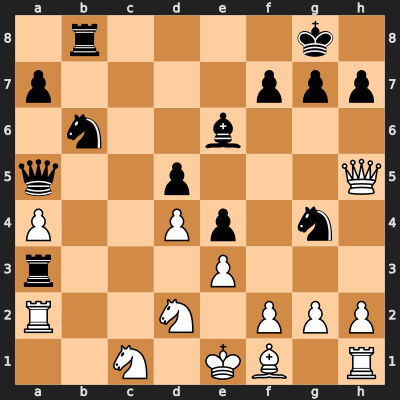

b6c6 -0.67661643


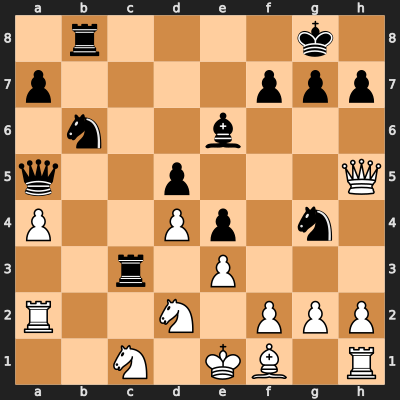

b6b5 -0.6865804


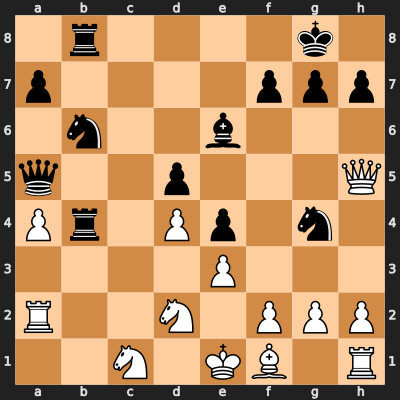

b6b8 -0.6950849


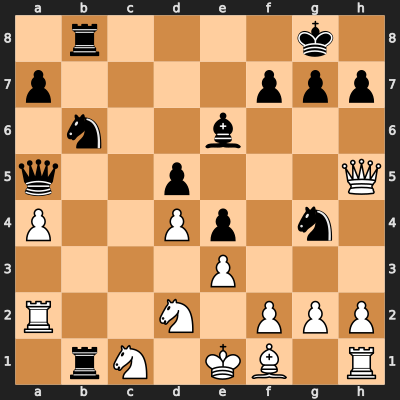

b6b7 -0.7007397


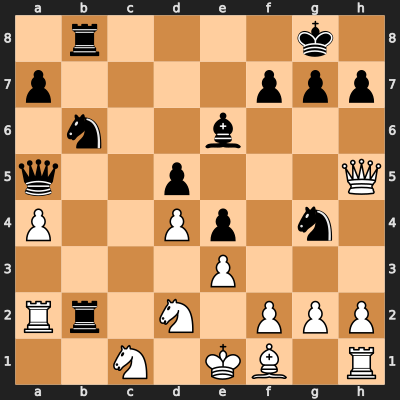

In [9]:
import chess
import chess.svg
from IPython.display import display, Image

board = chess.Board("2n1kb1r/r2n1ppp/1R2p3/p2pP1N1/Q2P3q/1N2B3/P4PPP/1R4K1 w k - 1 18")
options = []

for move in board.legal_moves:
    board_copy = board.copy()
    board_copy.push(move)
    board_copy = board_copy.mirror()

    value = chess_model(encode_board(board_copy)).numpy()[0][0]
    options.append((move, board_copy, value))

options.sort(key=lambda x: x[2], reverse=True)
options

for move, board_copy, value in options:
    print(move, value)
    display(chess.svg.board(board_copy, size=400))